### 필요 라이브러리 & 데이터셋

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('spotify_sample_submission.csv')

### 데이터 설명

- id: Spotify 데이터베이스에 있는 곡의 식별자
- artists: 아티스트 이름
- name: 노래 이름
- year: 출시 연도
- release_date: 연-월-일로 코딩된 노래의 발매일. 그러나 모든 노래에 전체 정보가 있는 것은 아니므로 예를 들어 연도만 포함되어 있을 수 있습니다.
- acousticness: 0에서 1 사이로, 노래가 얼마나 음향적인지 나타냅니다.
- danceability: 0에서 1 사이로, 노래가 얼마나 춤추기 쉬운지 나타냅니다.
- duration_ms: 밀리초 단위의 지속 시간입니다.
- energy: 0에서 1 사이, 음악이 얼마나 활기찬지.
- explicit: 노래에 노골적인 내용의 가사가 포함되어 있으면 1, 그렇지 않으면 0입니다.
- instrumentalness: 0에서 1 사이로, 노래의 악기 연주 정도입니다.
- key: 여기에 매핑된 노래의 음색입니다.
- liveness: 0에서 1 사이, 노래가 얼마나 "라이브"인지 나타냅니다.
- loudness: 음악의 음량입니다. 이 값은 일반적으로 음악의 데시벨 양을 나타내는 -60에서 0 사이입니다.
- mode: 음악이 메이저 키인 경우 1, 마이너 키인 경우 0입니다. 일반적으로 높은 음조의 음악은 행복한 음악으로 간주되고 낮은 음조의 음악은 더 슬픈 음악으로 간주됩니다.
- speechness: 0에서 1 사이로, 음악에서 발성/말하는 정도를 나타냅니다.
- tempo: 노래의 템포(분당 비트 수, BPM)입니다.
- valence: 0에서 1 사이의 값으로 노래의 긍정성을 나타내며, 긍정적인 노래(행복, 기쁨, 행복감 등)는 높은 값, 부정적인 노래(슬픔, 분노 등)는 낮은 값으로 표시됩니다.
- popularity: 0에서 100 사이, 노래의 인기도입니다. 이 세트에서는 이것이 대상 변수입니다.

In [6]:
# 결측치 확인
print(train.isnull().sum())
print('*'*30)
print(test.isna().sum())

# 결측치 없는 것 확인

id                  0
artists             0
name                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64
******************************
id                  0
artists             0
name                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
dtype: int64


In [7]:
# 데이터 요약통계량
train.describe(include='all')

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
count,129172,129172,129172,129172.000000,129172.000000,129172.000000,1.291720e+05,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172,129172.000000,129172.000000,129172.000000,129172.000000
unique,129172,30429,106371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10199,NaN,NaN,NaN,NaN
top,7pQSmQ0l7QdBeL9X6CEMbH,['Tadeusz Dolega Mostowicz'],Winter Wonderland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945,NaN,NaN,NaN,NaN
freq,1,952,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1976.579762,0.501950,0.536076,2.328895e+05,0.481096,0.067956,0.194286,5.207050,0.211519,-11.767025,0.703868,NaN,0.105871,116.943154,0.525167,25.915539
std,NaN,NaN,NaN,26.722407,0.379088,0.175803,1.492669e+05,0.271778,0.251671,0.332443,3.516778,0.180989,5.679598,0.456552,NaN,0.182878,30.348323,0.264451,21.876377
min,NaN,NaN,NaN,1920.000000,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1955.000000,0.091800,0.414000,1.662930e+05,0.248000,0.000000,0.000000,2.000000,0.099300,-14.905000,0.000000,NaN,0.035100,93.755500,0.311000,1.000000
50%,NaN,NaN,NaN,1977.000000,0.523000,0.547000,2.056665e+05,0.463000,0.000000,0.000482,5.000000,0.138000,-10.868000,1.000000,NaN,0.045400,115.639500,0.537000,26.000000
75%,NaN,NaN,NaN,1998.000000,0.895000,0.668000,2.658400e+05,0.707000,0.000000,0.234000,8.000000,0.270000,-7.532000,1.000000,NaN,0.076300,135.014000,0.744000,42.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

### 중복 column 삭제
- 'year'과 'release_date'는 동일 내용을 담고 있어서 삭제함

In [9]:
# year와 release_data는 중복
train = train.drop('year',axis=1)
test= test.drop('year',axis=1)

### 상관계수

In [10]:
# 상관계수
train.corr()

<ipython-input-10-09ceffa31506>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
acousticness,1.000000,-0.263446,-0.087591,-0.749734,-0.207869,0.224215,-0.026692,-0.030267,-0.542569,0.065685,-0.022603,-0.219324,-0.166737,-0.408206
danceability,-0.263446,1.000000,-0.101574,0.207147,0.201365,-0.219149,0.025205,-0.109306,0.251570,-0.046713,0.241415,0.002451,0.540562,0.129657
duration_ms,-0.087591,-0.101574,1.000000,0.059383,-0.034832,0.103110,0.000535,0.031833,0.021038,-0.046835,-0.097496,-0.008338,-0.184650,0.024787
energy,-0.749734,0.207147,0.059383,1.000000,0.102161,-0.179581,0.035897,0.133413,0.777683,-0.057799,-0.114252,0.262917,0.328542,0.340235
explicit,-0.207869,0.201365,-0.034832,0.102161,1.000000,-0.129241,0.006451,0.038892,0.105336,-0.065999,0.356334,0.004790,-0.009063,0.153227
instrumentalness,0.224215,-0.219149,0.103110,-0.179581,-0.129241,1.000000,-0.004247,-0.045743,-0.318725,-0.056320,-0.133433,-0.065616,-0.214663,-0.298157
key,-0.026692,0.025205,0.000535,0.035897,0.006451,-0.004247,1.000000,-0.004951,0.024940,-0.126280,0.012874,0.005985,0.026535,0.000432
liveness,-0.030267,-0.109306,0.031833,0.133413,0.038892,-0.045743,-0.004951,1.000000,0.059482,0.000512,0.122887,0.008360,-0.005164,-0.082833
loudness,-0.542569,0.251570,0.021038,0.777683,0.105336,-0.318725,0.024940,0.059482,1.000000,-0.020529,-0.215056,0.213296,0.302691,0.346347
mode,0.065685,-0.046713,-0.046835,-0.057799,-0.065999,-0.056320,-0.126280,0.000512,-0.020529,1.000000,-0.041850,0.001164,0.021752,0.003625


<ipython-input-11-5864e13940df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_cor = train.corr()
<ipython-input-11-5864e13940df>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(train_cor,dtype=np.bool)


<Axes: >

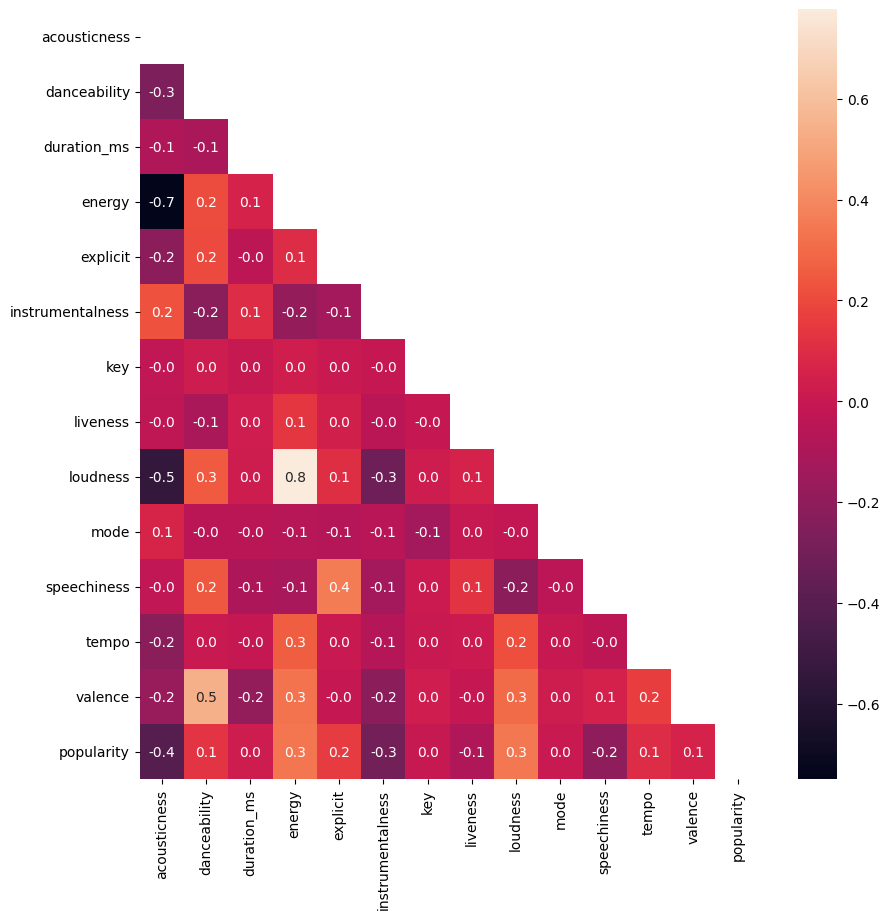

In [11]:
train_cor = train.corr()

mask=np.zeros_like(train_cor,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_cor, annot=True, fmt=".1f", mask=mask)

# energy와 loudness 간의 상관계수가 높다
# popularity 상관관계 : acousticness > energy =loudness = instrumentalness
# 이전에는 year가 가장 높은 상관계수였는데 drop하면서 없어짐

### 시각화

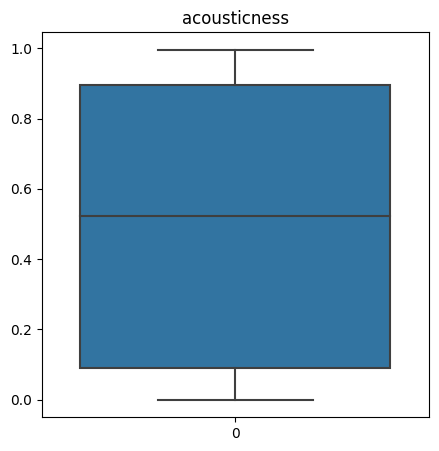

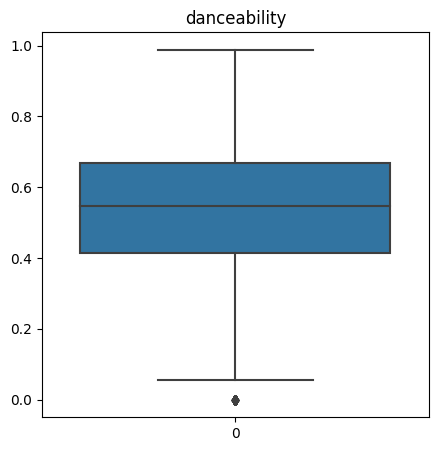

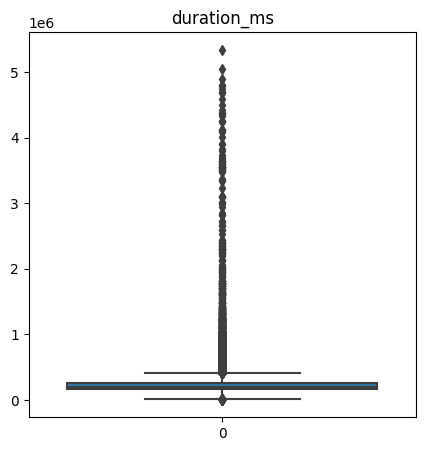

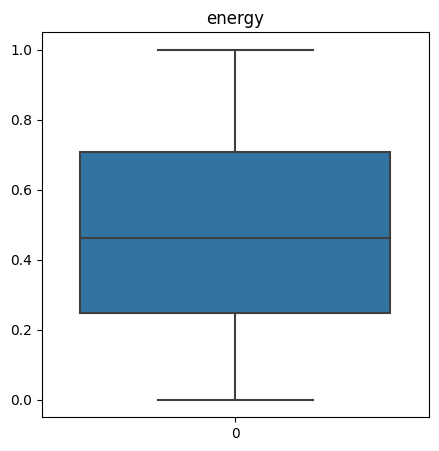

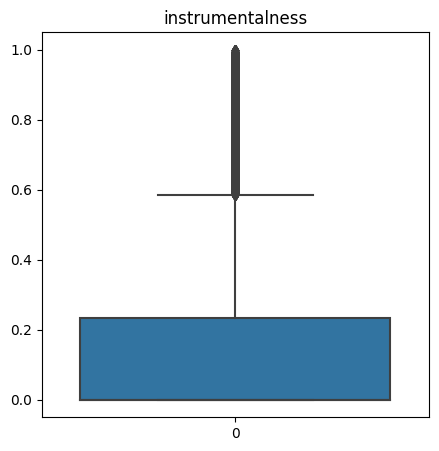

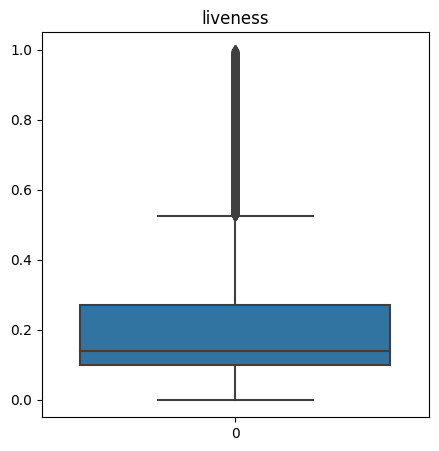

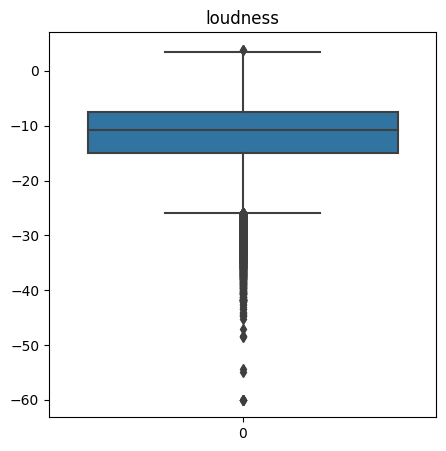

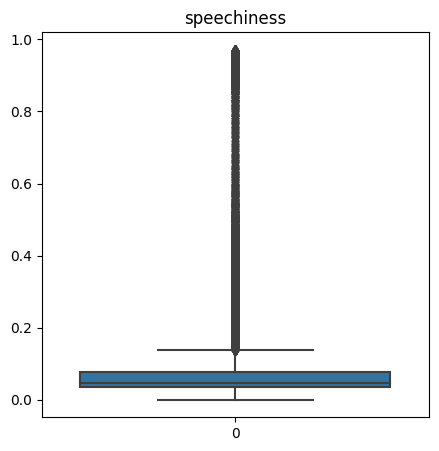

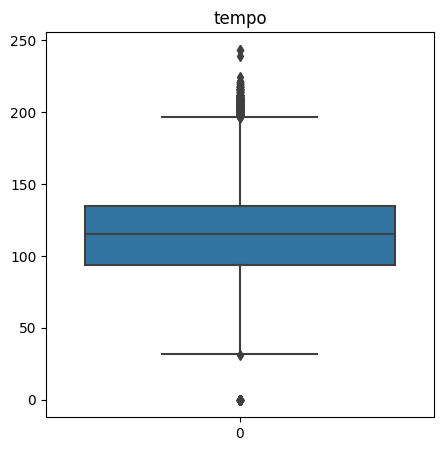

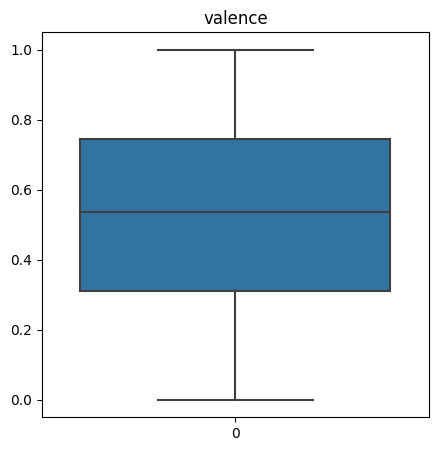

In [12]:
# 이상치 탐지를 위해 boxplot
for i in train.columns:
  if train[i].dtype == 'float64' or i =='duration_ms' :
    plt.figure(figsize=(5,5))
    plt.title(i)
    sns.boxplot(train[str(i)])
    plt.show()

# 극단치가 있긴 하지만 주어진 범주 내에 속함

253000    43
192000    43
180000    42
175000    41
186000    39
          ..
126802     1
187164     1
820907     1
240274     1
444912     1
Name: duration_ms, Length: 47674, dtype: int64


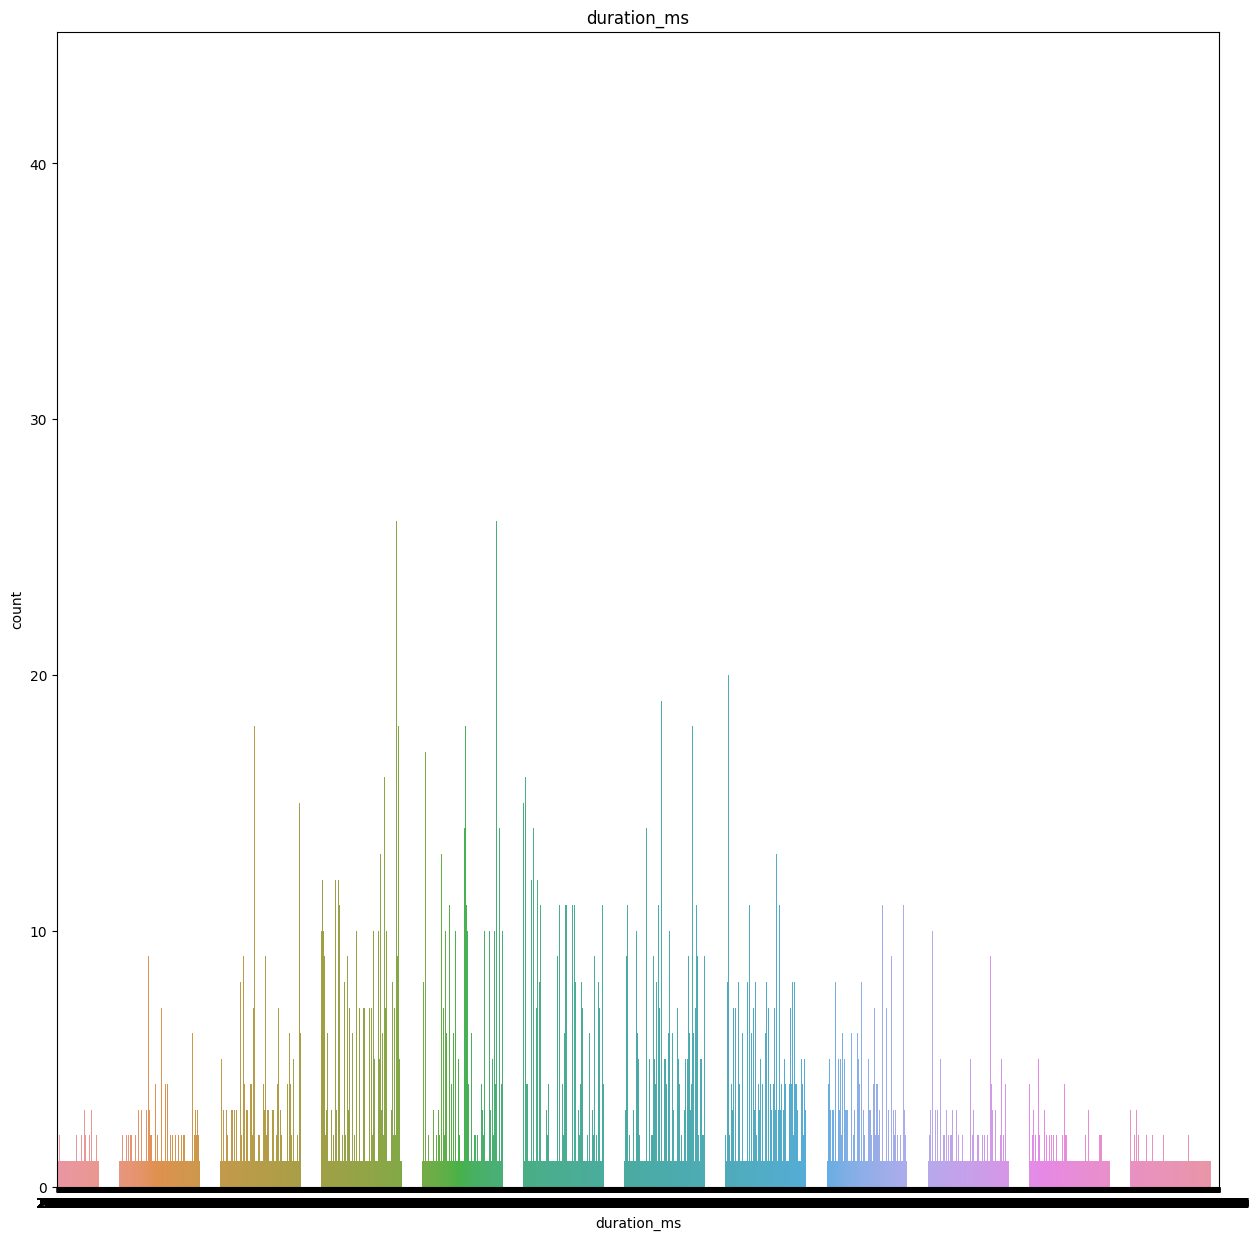

0    120394
1      8778
Name: explicit, dtype: int64


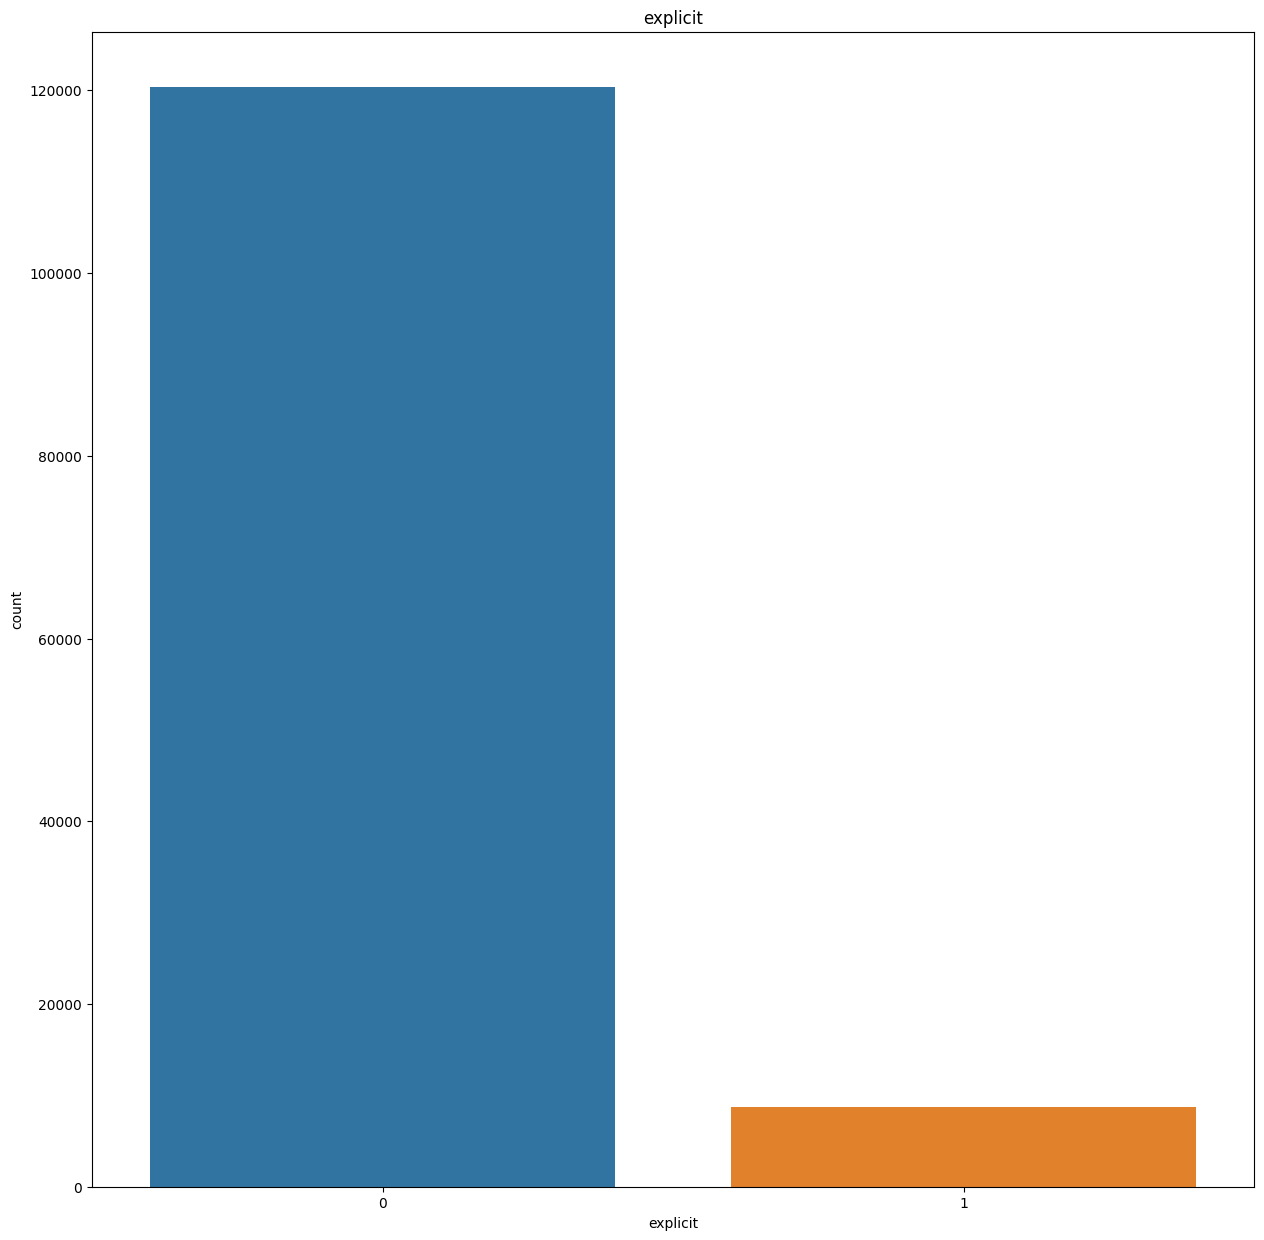

0     16211
7     15798
2     14002
9     13352
5     12321
1     10081
4      9877
10     9244
11     8134
8      7955
6      6836
3      5361
Name: key, dtype: int64


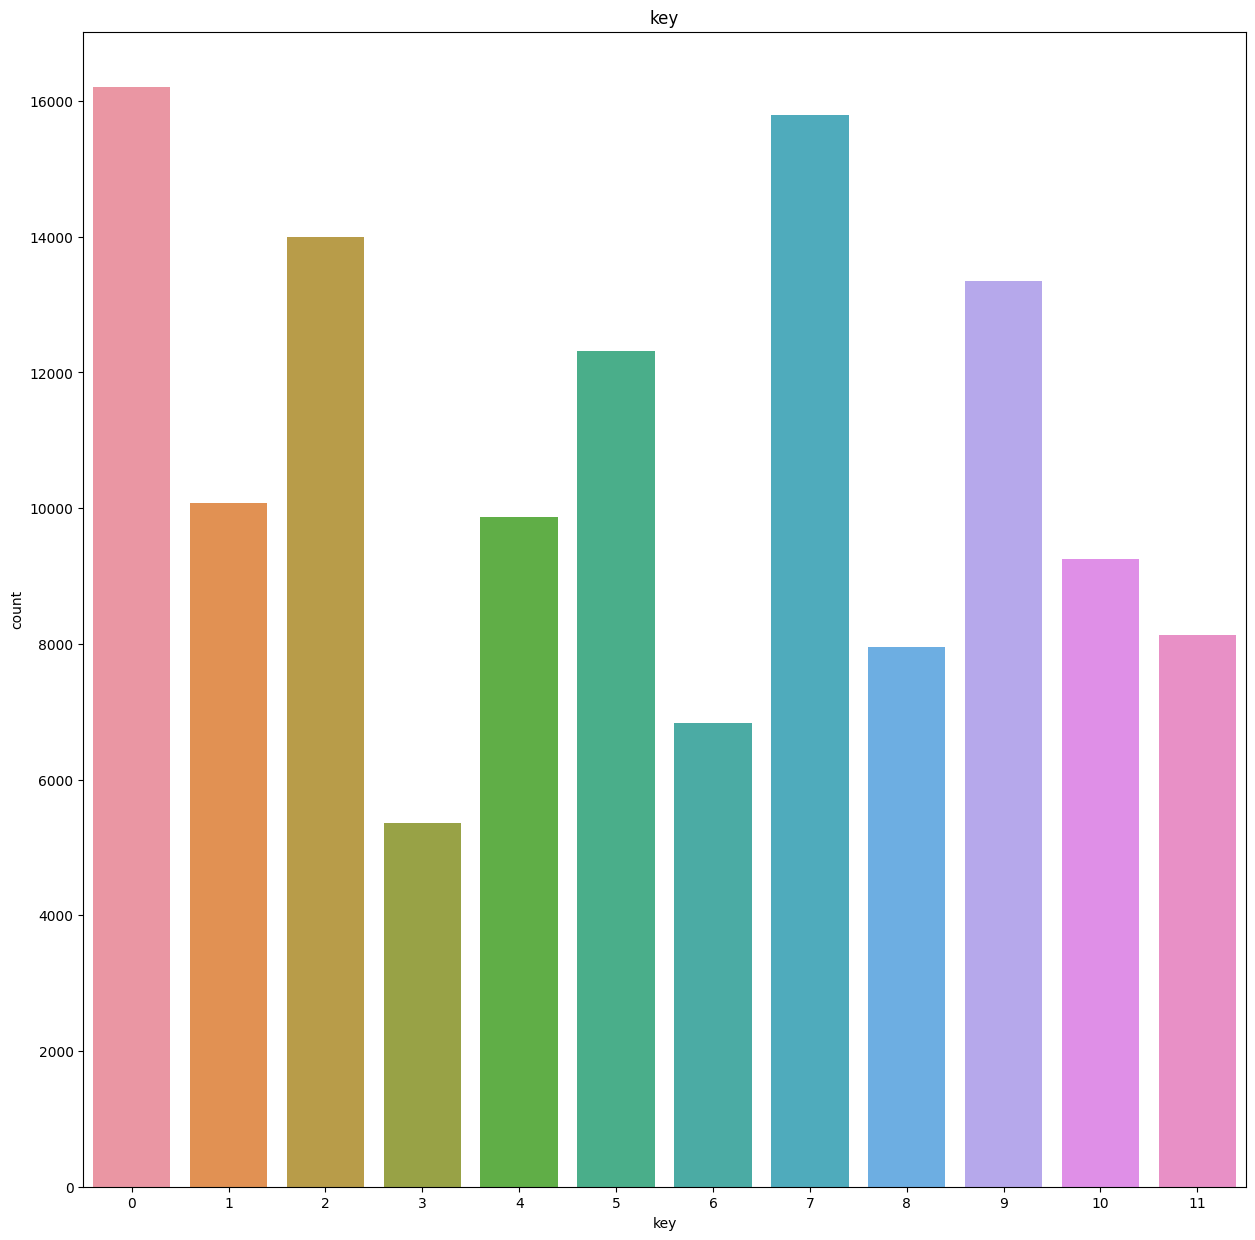

1    90920
0    38252
Name: mode, dtype: int64


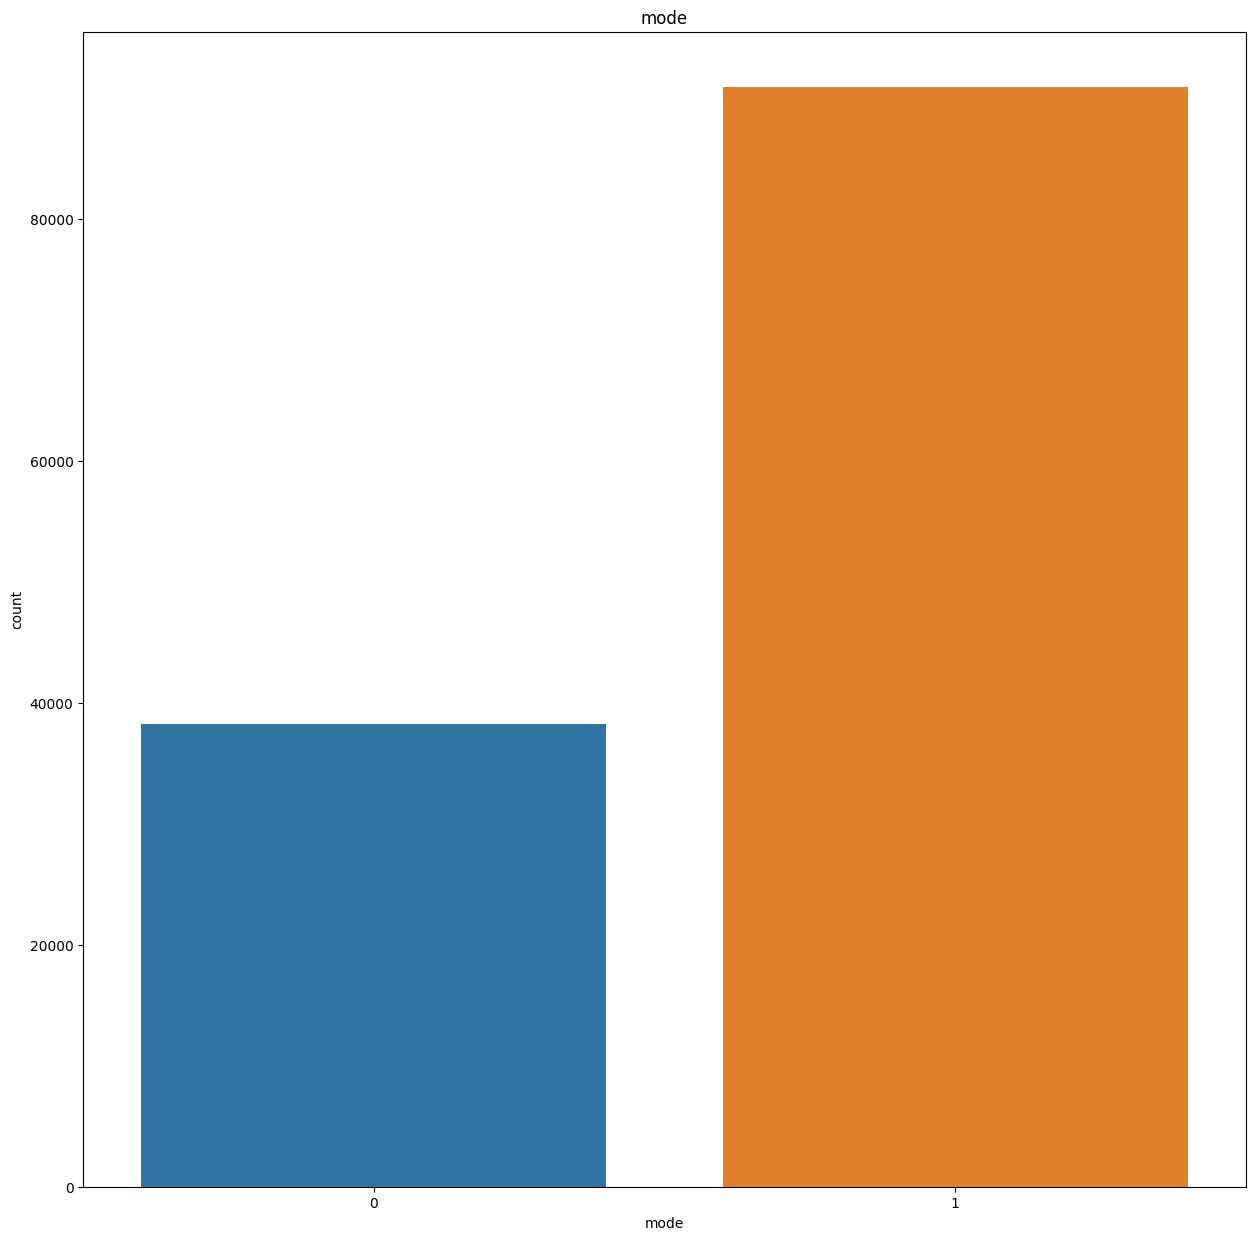

0     29820
1      2785
33     2113
34     2110
36     2096
      ...  
92        4
94        3
96        1
93        1
95        1
Name: popularity, Length: 97, dtype: int64


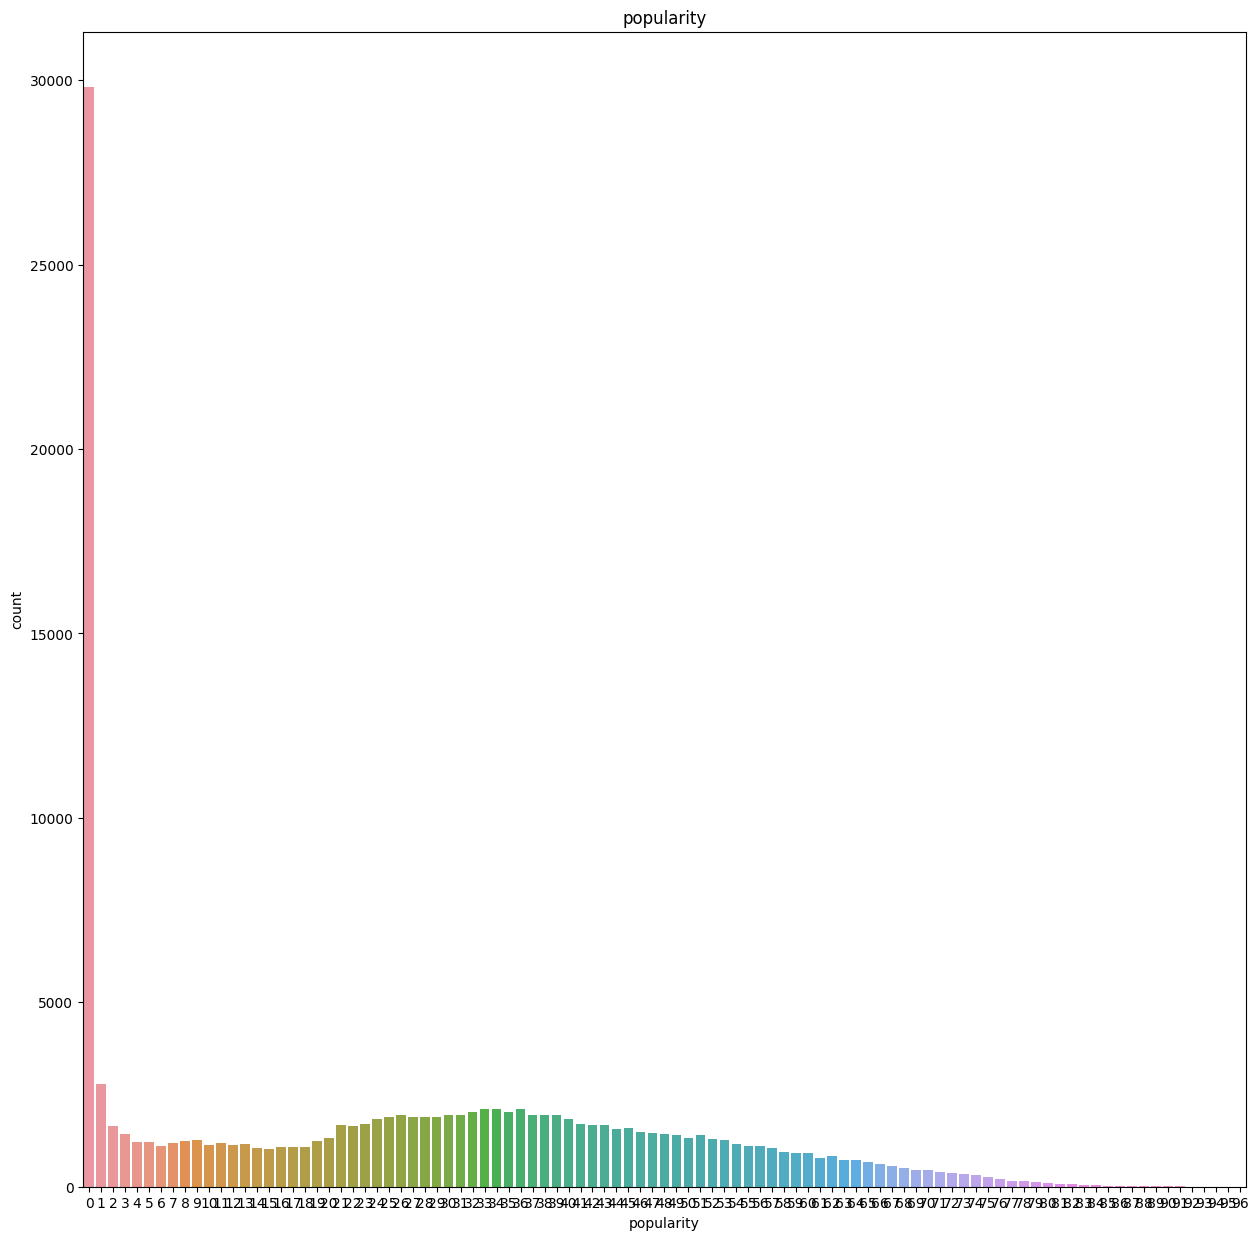

In [13]:
for i in train.columns:
  if train[i].dtype == 'int64' or i =='duration_ms' :
    print(train[str(i)].value_counts())
    plt.figure(figsize=(15,15))
    plt.title(i)
    sns.countplot(x=str(i),data=train)
    plt.show()


In [14]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [15]:
features = train.columns.drop(['popularity','id','name','artists','release_date']).tolist()
target = 'popularity'

X = train[features]
y = train[features]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

#스케일러 초기화
Robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Robust 적용
X_train_robust = Robust_scaler.fit_transform(X_train)
X_val_robust = Robust_scaler.fit_transform(X_val)

# MinMax 스케일링 적용
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_val_minmax = minmax_scaler.transform(X_val)

# Standard 스케일링 적용
X_train_std = standard_scaler.fit_transform(X_train)
X_val_std = standard_scaler.transform(X_val)

In [16]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# 스케일러 초기화
Robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# 모델 및 파라미터 그리드 설정
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet()
    # 'XGBoost' : XGBRegressor(objective='reg:squarederror', random_state=42),
    # 'RandomForest' : RandomForestRegressor(random_state=42)
}

params = {
    'Lasso': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [500, 1000,5000,10000],
        'tol': [0.00001,0.0001, 0.001]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 500, 1000,5000,10000],
        'tol': [0.00001,0.0001, 0.001]
    },
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
        'max_iter': [100,500, 1000],
        'tol': [0.00001,0.0001, 0.001, 0.01]
    },
    # 'XGBoost' : {
    #              'max_depth' : np.arange(5,9,1) ,
    #               "n_estimators": [500],
    #               'min_child_weight' : np.arange(1, 5, 1),
    #               'gamma' : [0,1,2,3],
    #               "learning_rate": [0.05, 0.075, 0.1],
    #               'subsample' :np.arange(0.8, 1.0, 0.1)
    # },
    # 'RandomForest' : {
    #     'n_estimators' : [100,500,1000],
    #     'max_features' :  ['sqrt'],
    #     'max_depth' : [10, 20, 30, 40, 50],
    #     'min_samples_split' :  [2],
    #     'bootstrap' :  [False]
    # }
}

# 스케일링 방법
scaling_methods = {
    'Robust Scaling': (X_train_robust, X_val_robust),
    'MinMax Scaling': (X_train_minmax, X_val_minmax),
    'Standard Scaling': (X_train_std, X_val_std)
}

# 그리드 서치 및 MAE 계산
best_rmse = float('inf')
best_model = None
best_params = None
best_scaling = None

for name, model in models.items():
    for method, (X_train_scaled, X_val_scaled) in scaling_methods.items():
        grid = GridSearchCV(model, params[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        grid.fit(X_train_scaled, y_train)
        y_pred = grid.predict(X_val_scaled)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = name
            best_params = grid.best_params_
            best_scaling = method

print(f"Best Model: {best_model}")
print(f"Best Scaling Method: {best_scaling}")
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")


Best Model: Ridge
Best Scaling Method: Standard Scaling
Best Parameters: {'alpha': 0.001, 'max_iter': 100, 'tol': 1e-05}
Best RMSE: 0.0003757860779252314


In [17]:
X_test = test[features]

In [18]:
# 선택한 모델로 스케일링된 테스트 데이터에 대한 예측 수행
X_test_scaled = None



# 학습 데이터에 대해 스케일러를 학습(fit)시킴
Robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# test 독립변수에 최적의 스케일러 적용
if best_scaling == 'MinMax Scaling':
    #minmax_scaler.fit(X_test_store)
    X_test_scaled = minmax_scaler.transform(X_test)
elif best_scaling == 'Standard Scaling':
    standard_scaler.fit(X_train)
    X_train_scaled = standard_scaler.transform(X_train)
    X_test_scaled = standard_scaler.transform(X_test)
elif best_scaling == 'Robust Scaling':
    #Robust_scaler.fit(X_test_store)
    X_test_scaled = Robust_scaler.transform(X_test)

y_pred_test = None

# 최적의 모델 선택
if best_model == 'Lasso':
    model = Lasso(**best_params)
elif best_model == 'Ridge':
    model = Ridge(**best_params)
elif best_model == 'ElasticNet':
    model = ElasticNet(**best_params)
# elif best_model == 'XGBoost':
#     model_store = XGBRegressor(**best_params)
# elif best_model == 'RandomForest':
#     model_store = RandomForestRegressor(**best_params)

# 모델 학습
model.fit(X_train_scaled, y_train)
# 예측값
y_pred_test = model.predict(X_test_scaled)


In [45]:
# 예측값이 0보다 작다면 0으로 대체
y_pred_test[y_pred_test < 0] = 0

In [46]:
# y_pred_test 배열을 1D 배열로 변경 - 2D 배열로 인해 오류가 발생했음
y_pred_test = y_pred_test.flatten()

# predicted_popularity 열의 길이가 데이터프레임 인덱스 길이와 일치하지 않음 - test 행수랑 일치하지 않아서.
# 이에 따라 X_test와 y_pred_test길이를 일치하게 만듦
y_pred_test = y_pred_test[:len(X_test)]

# 데이터프레임에 예측 결과를 추가
test['predicted_popularity'] = y_pred_test

# 'predicted_popularity' 열이 추가된 데이터프레임을 확인
print(test)

# CSV 파일로 데이터프레임 저장
test.to_csv('Spotify_popularity_prediction.csv', index=False)

                           id  \
0      6IfByzdeGt3iIsakTp16vz   
1      17TO3XH1slhDyqnwypne06   
2      5chxjST0MfWZPsaHrWgiqe   
3      4Db6PxFIiK1a6nCEJABTHk   
4      3MPKTMJIxlORqcxw542HHK   
...                       ...   
43053  1L0vlG1tEWAA5QPPpoeBez   
43054  3gh5bl5nBDN6ubcbxltKdr   
43055  6gVkG8f7ldsQs0jAI8cB4X   
43056  6n6OQfBpCgzF9oEg8zhBN7   
43057  6Qwuw0eOeszVlewLpu24gR   

                                                 artists  \
0                                      ['Amanda Miguel']   
1                                         ['Joe Cocker']   
2                                          ['Los Bukis']   
3                                       ['Depeche Mode']   
4                         ['Naughty By Nature', 'Zhané']   
...                                                  ...   
43053                                 ['Oscar Peterson']   
43054  ['Claude Debussy', 'Roger Desormière/Choeurs Y...   
43055                                  ['Lenny LeBlanc']   
430

In [47]:
Trial1 = pd.read_csv('Spotify_popularity_prediction.csv')
Trial1

,id,artists,name,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,predicted_popularity
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340,3.502117e-01
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460,4.131854e-01
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230,2.602090e+00
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950,3.169558e-01
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560,9.646730e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780,3.279440e-02
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371,1.818460e+00
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730,3.351176e-01
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500,4.854268e-01
